In [1]:
import os
import sys
import cv2
import glob
from os.path import isfile, join

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import model_from_json

from sklearn.metrics import roc_curve
from sklearn import metrics

from IPython.display import display
from IPython.display import Image as _Imgdis
from IPython.display import Markdown

from ipywidgets import IntProgress

from sklearn.utils import shuffle


import json
import csv

import pandas as pd 

# Tira os warning do TF
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


### Leitura dos resultados

In [2]:
lista_history = []
lista_fpr = []
lista_tpr = []
for n in range (1,4):
    lista_history.append(json.load(open("Modelos e Metricas/" + str(n) + "/History" + str(n) + ".json", 'r')))
    with open("Modelos e Metricas/" + str(n) + "/fpr" + str(n) + ".csv", 'r') as f:
        data = pd.read_csv(f,header=None)
        dfValues = data.values
        lista_fpr.append(dfValues)
    with open("Modelos e Metricas/" + str(n) + "/tpr" + str(n) + ".csv", 'r') as f:
        data = pd.read_csv(f,header=None)
        dfValues = data.values
        lista_tpr.append(dfValues)

### Acurácia e Loss

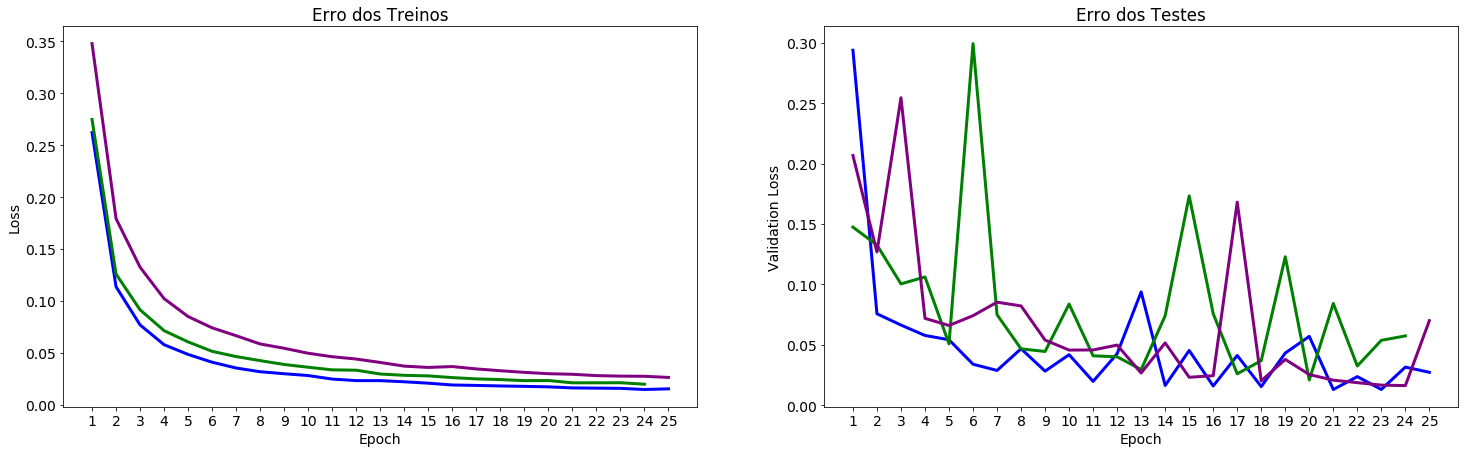

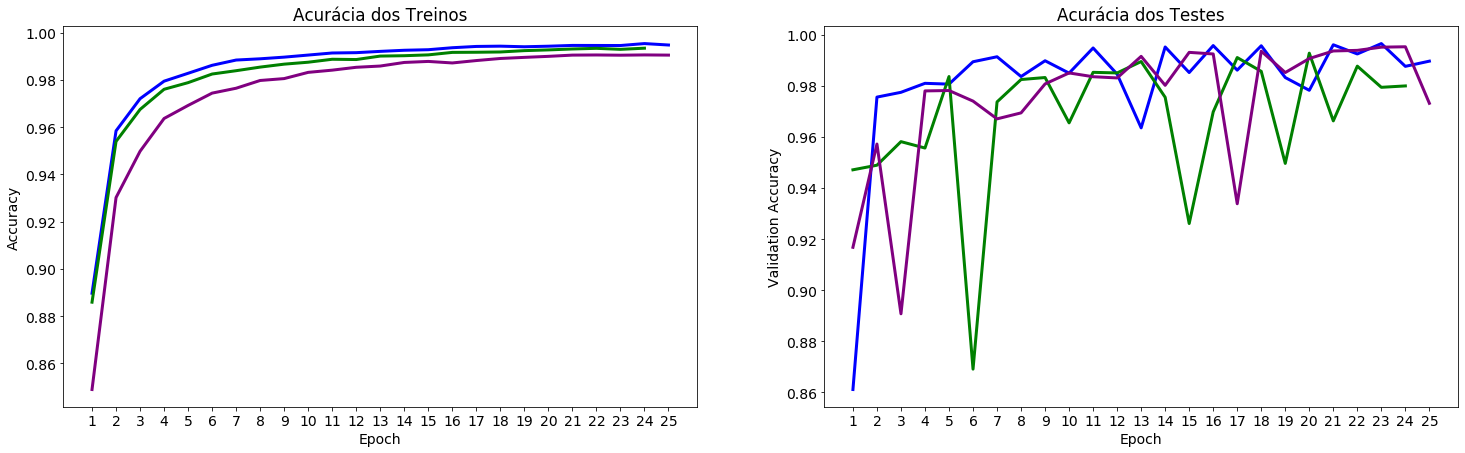

In [3]:
# Gera graficos do resultado do treino
mpl.rc("font", **{"size": 14})
fig, axes = plt.subplots(1, 2, figsize=(25, 7))

# Loss
axes[0].plot(range(1, len(lista_history[0]['loss'])+1), lista_history[0]["loss"], color="blue", lw=3)
axes[0].plot(range(1, len(lista_history[1]['loss'])+1), lista_history[1]["loss"], color="green", lw=3)
axes[0].plot(range(1, len(lista_history[2]['loss'])+1), lista_history[2]["loss"], color="purple", lw=3)
axes[0].set_ylabel("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_title('Erro dos Treinos')
axes[0].set_xticks(range(1, len(lista_history[0]['loss'])+1))

# Val Loss
axes[1].plot(range(1, len(lista_history[0]['val_loss'])+1), lista_history[0]["val_loss"], color="blue", lw=3)
axes[1].plot(range(1, len(lista_history[1]['val_loss'])+1), lista_history[1]["val_loss"], color="green", lw=3)
axes[1].plot(range(1, len(lista_history[2]['val_loss'])+1), lista_history[2]["val_loss"], color="purple", lw=3)
axes[1].set_ylabel("Validation Loss")
axes[1].set_xlabel("Epoch")
axes[1].set_title('Erro dos Testes')
axes[1].set_xticks(range(1, len(lista_history[0]['val_loss'])+1))
plt.show()

# Gera graficos do resultado do treino
mpl.rc("font", **{"size": 14})
fig, axes = plt.subplots(1, 2, figsize=(25, 7))

# Accuracy
axes[0].plot(range(1, len(lista_history[0]['acc'])+1), lista_history[0]["acc"], color="blue", lw=3)
axes[0].plot(range(1, len(lista_history[1]['acc'])+1), lista_history[1]["acc"], color="green", lw=3)
axes[0].plot(range(1, len(lista_history[2]['acc'])+1), lista_history[2]["acc"], color="purple", lw=3)
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_title('Acurácia dos Treinos')
axes[0].set_xticks(range(1, len(lista_history[0]['acc'])+1))

# Val Accuracy
axes[1].plot(range(1, len(lista_history[0]['val_acc'])+1), lista_history[0]["val_acc"], color="blue", lw=3)
axes[1].plot(range(1, len(lista_history[1]['val_acc'])+1), lista_history[1]["val_acc"], color="green", lw=3)
axes[1].plot(range(1, len(lista_history[2]['val_acc'])+1), lista_history[2]["val_acc"], color="purple", lw=3)
axes[1].set_ylabel("Validation Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_title('Acurácia dos Testes')
axes[1].set_xticks(range(1, len(lista_history[0]['val_acc'])+1))
plt.show()

    Podemos observar por meio dos gráficos que o modelo parece estar regularizado(erro de treino minimizado e acurácia de treino maximizada). Contudo podemos observar "picos" altos no erro dos testes que são acompanhas por "picos" baixos da acurácia de teste, o que é um sinal de overfitting no modelo.

### Accuracy de Treino X Accuracy de Teste - Melhor Modelo

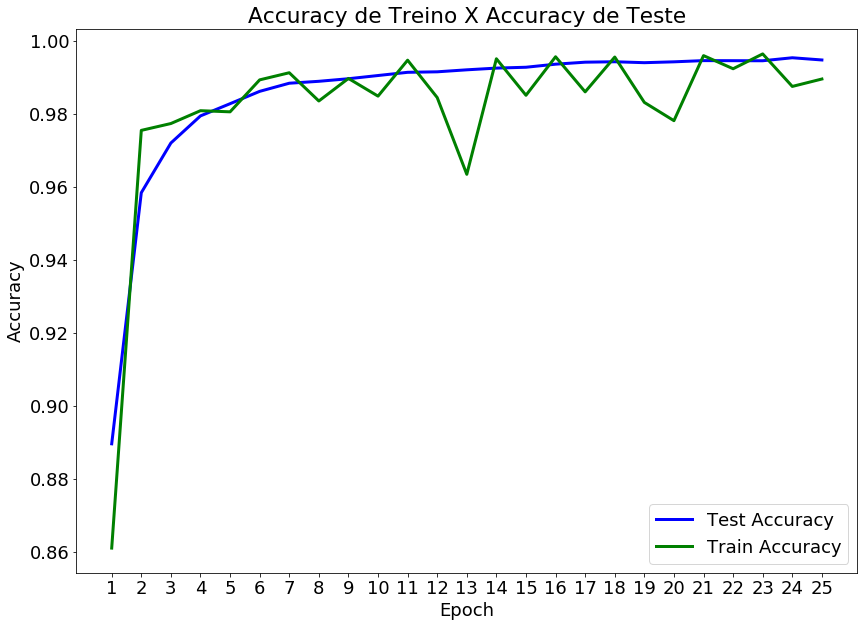

In [4]:
mpl.rc("font", **{"size": 18})
plt.figure(figsize=(14, 10))
plt.plot (range(1, len(lista_history[0]['acc'])+1), lista_history[0]["acc"], color="blue", label="Test Accuracy", lw=3)
plt.plot(range(1, len(lista_history[0]['val_acc'])+1), lista_history[0]["val_acc"], color="green", label="Train Accuracy" , lw=3)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title('Accuracy de Treino X Accuracy de Teste')
plt.xticks(range(1, len(lista_history[0]['acc'])+1))
plt.legend()
plt.savefig('Accuracy de Treino X Accuracy de Teste.png')
plt.show()

        A acurácia de treino está próxima da acurácia de teste (variação máxima de 2%), mas mais uma vez constatamos sinais de overfitting em alguns pontos do gráfico.

### Curva ROC - Melhor modelo

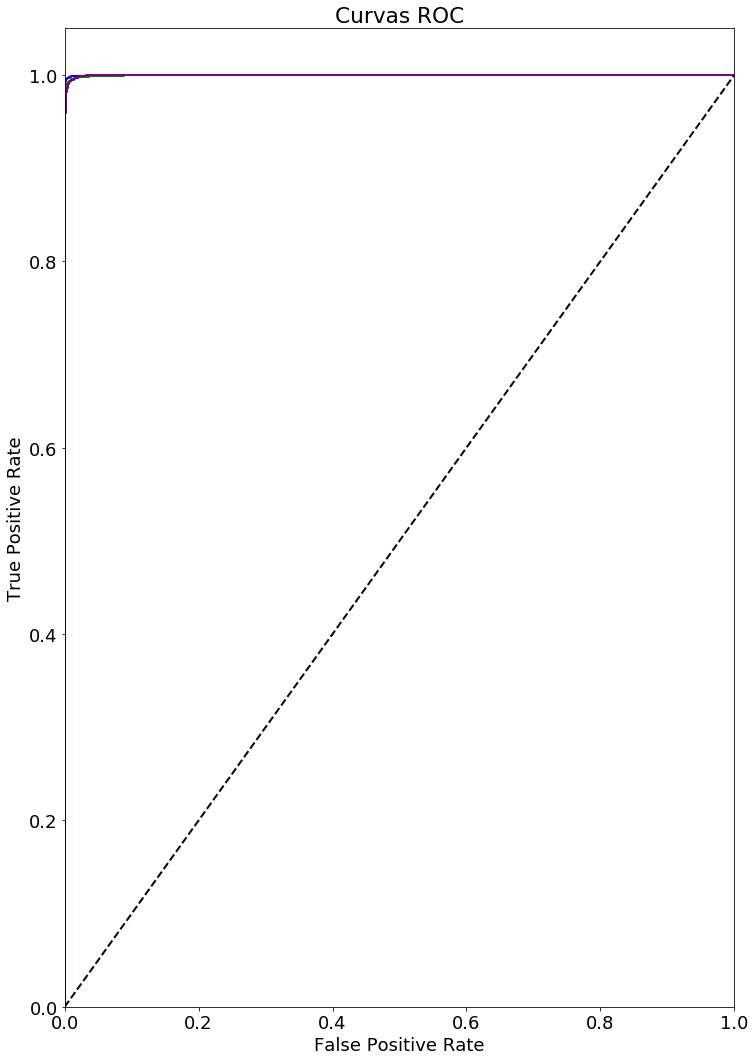

In [5]:
mpl.rc("font", **{"size": 18})
plt.figure(figsize=(12, 18))
plt.plot(lista_fpr[0],lista_tpr[0], color='blue',lw=2)
plt.plot(lista_fpr[1],lista_tpr[1], color='green',lw=2)
plt.plot(lista_fpr[2],lista_tpr[2], color='purple',lw=2)
plt.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.show()

    A curva ROC está muito próxima a ser perpendicular ao eixo Y, e isso mostra a grande capacidade do modelo na classificação dos dados.

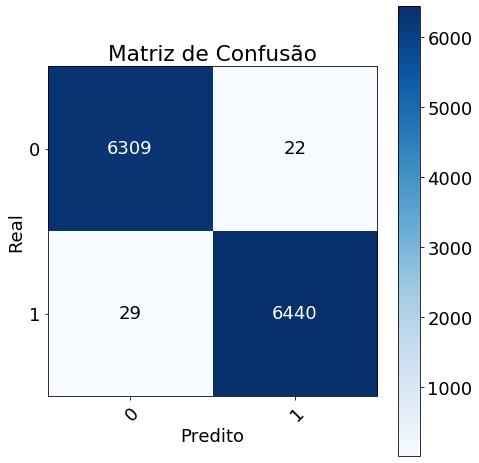

In [6]:
i=1
cm = []

with open("Modelos e Metricas/" + str(i) + "/cm" + str(i) + ".csv", 'r') as f:
    df = pd.read_csv(f,header=None)
    # Create an empty list
  
    # Iterate over each row 
    for index, rows in df.iterrows(): 
        # Create list for the current row 
        my_list =[rows[0], rows[1]] 
      
        # append the list to the final list 
        cm.append(my_list) 

cm = np.asarray(cm,dtype=int)

classes = list(range(0, 2))
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title="Matriz de Confusão",
       ylabel="Real",
       xlabel="Predito")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")
fig.tight_layout()
plt.savefig('cm.png')
plt.show()

    A Matriz de Confusão indica que os erro de Falso Positivo (imagem real ser classificada como  falsa) e 
    de Falso Negativo (imagem falsa ser considerada real) estão bem próximos.

### Testando o modelo em imagens geradas por outra GAN

In [7]:
# Reconstruindo Modelo
with open("Modelos e Metricas/" + str(i) + "/model" + str(i) + ".json", 'r') as f:
    model = model_from_json(f.read())

# Carregando Pesos
model.load_weights("Modelos e Metricas/" + str(i) + "/model" + str(i) + ".h5")

Carregando 20000 imagens...
 Progresso:


IntProgress(value=0, max=20000)

Concluído.


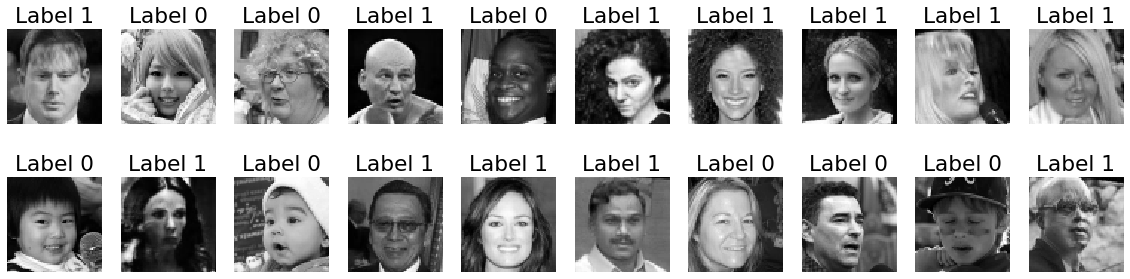

In [8]:
# Imagens reais.
folderReal = "RealPPTeste"
onlyfilesReal = [f for f in os.listdir(folderReal) if os.path.isfile(os.path.join(folderReal, f))]
   
# Imagens fake. 
folderFake = "FakePPTeste"
onlyfilesFake = [f for f in os.listdir(folderFake) if os.path.isfile(os.path.join(folderFake, f))]

# Listas para as imagens e os labels.
n_img = len(onlyfilesReal) + len(onlyfilesFake)
images = np.empty((n_img,64,64), dtype=float)
images_labels = []

print("Carregando", n_img, "imagens...\n", "Progresso:")

# Barra de progresso.
progresso = IntProgress(min=0, max=n_img)
display(progresso)

# Leitura das imagens reais.
for n in range(0, len(onlyfilesReal)):
    images_labels.append(int(0))
    img = cv2.imread(join(folderReal,onlyfilesReal[n]),0)
    img = img/255
    images[n] = img
    progresso.value += 1
    
inicio2classe = n + 1  # Salva o inicio da proxima classe.

# Leitura das imagens fake.
for n in range(n, n_img-1):
    images_labels.append(int(1))
    img = cv2.imread(join(folderFake,onlyfilesFake[n-(inicio2classe-1)]),0)
    img = img/255
    images[n] = img
    progresso.value += 1
print("Concluído.")

images, images_labels = shuffle(images, images_labels)

n_rows = 2
n_cols = 10
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5))

for i in range(n_rows):
    for j in range(n_cols):
        img_i = np.random.randint(0, images.shape[0])
        axes[i][j].imshow(images[img_i], cmap="gray")
        axes[i][j].set_title("Label {}".format(images_labels[img_i]))
        axes[i][j].axis("off")
plt.show()

In [9]:
# Testando modelo
images = np.expand_dims(images, 3)            
images_labels = to_categorical(images_labels)
optimizer = optimizers.SGD(lr=0.005,decay=0.00015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=["accuracy"])
score=model.evaluate(images, images_labels, verbose=2)
print("Loss:")
print(score[0])
print("Acc:")
print(score[1])

Loss:
0.5078806355148554
Acc:
0.84285


In [10]:
y_proba = model.predict(images)
y_pred = np.argmax(y_proba, axis=1)
y_true = np.argmax(images_labels, axis=1)

cm = metrics.confusion_matrix(y_true, y_pred)

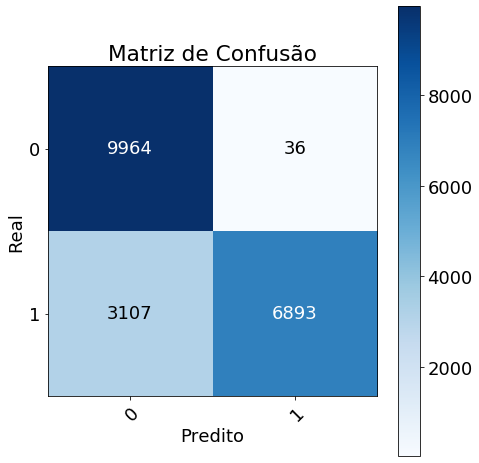

In [11]:
classes = list(range(0, 2))
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title="Matriz de Confusão",
       ylabel="Real",
       xlabel="Predito")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")
fig.tight_layout()
plt.show()

    A Matriz de Confusão mostra que os erro de Falso Positivo (imagem real ser classificada como  falsa) continuou próximo aos resultados do primeiro teste, porém o erro de Falso Negativo (imagem falsa ser considerada real) cresceu bastante, o que demonstra que o modelo criado não tem um performance tão boa para classificar imagens criadas por GANs que não foram utilizadas no treino.